In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../datasets/text_data.csv')
data.head()

,code,label,subcategory,feedback,criticality,organization,question,row_index
0,xn,Couldn't be improved,Nothing to improve,Nothing.,3,Trust A,Trust A - Q1,0
1,ee,Environment/ facilities,Environment/ facilities,Temperature in theatre a little low.,-1,Trust A,Trust A - Q1,1
2,ap,Access,Provision of services,Same service available at Bingham Health Centre.,-2,Trust A,Trust A - Q1,2
3,mi,Communication,Amount/clarity of information,Appointment details given over phone - no phys...,-1,Trust A,Trust A - Q1,3
4,mm,Communication,Communication,On one occasion I was not made aware that my a...,-3,Trust A,Trust A - Q1,4


In [3]:
data.shape

(10334, 8)

In [4]:
values = {'-5': 0,
 '-4': 0,
 '-3': 1,
 '-2': 1,
 '-1': 1,
 '0': 2,
 '1': 3,
 '2': 3,
 '3': 3,
 '4': 4,
 '5': 4}

In [5]:
data['sentiment_categories'] = data['criticality'].map(values)
data['sentiment_categories'].value_counts()

3.0    5025
2.0    2566
1.0    1630
4.0     882
0.0     195
Name: sentiment_categories, dtype: int64

In [6]:
text_data = data[['feedback', 'sentiment_categories']].dropna()

In [12]:
x = text_data[['feedback']].rename(columns = {'feedback':'predictor'})
y = text_data['sentiment_categories'].to_numpy()

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, index_training_data, index_test_data  = train_test_split(x, y, pd.DataFrame(x).index,
                                                                                             test_size=0.3,
                                                                                             stratify=y,
                                                                                             shuffle=True
                                                                                             )

In [14]:
from pxtextmining.factories.factory_pipeline import factory_pipeline

pipe = factory_pipeline(x_train, y_train)


Stripping punctuation from text...
Stripping excess spaces, whitespaces and line breaks from text...
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.


[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fdb1407e280>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fdb1544df70>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fdb18539040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__class_weight=ba

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6221456b50>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f621e3ebf70>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f62214d6040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2,

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 3080, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 70, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 101, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 4554, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 4562, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'predictor'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fdb14043c40>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fdb1544df70>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fdb18539040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__penalty=elasti

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/pandas/core/indexes/base.py", line 3080, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas/_libs/index.pyx", line 70, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/index.pyx", line 101, in pandas._libs.index.IndexEngine.get_loc
  File "pandas/_libs/hashtable_class_helper.pxi", line 4554, in pandas._libs.hashtable.PyObjectHashTable.get_item
  File "pandas/_libs/hashtable_class_helper.pxi", line 4562, in pandas._libs.hashtable.PyObjectHashTable.get_item
KeyError: 'predictor'

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f0962ee49a0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f095fcfa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f0962ed5040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__penalty=elastic

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f9da96809a0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f9da6497820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f9da9671040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__penalty=elastic

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
[Parallel(n_jobs=5)]: Done  22 tasks      | elapsed:  1.2min


[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd06a2a6940>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__class_weight=Non

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec456e39a0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__class_weight=Non

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fc2c659a0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__class_weight=Non

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe930b28940>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__class_weight=

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fbe0c6a90>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__class_weight=

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd065a7f070>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__class_weight=No

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe930b285e0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__class_weight=No

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f6410760>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__class_weight=No

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec3bdb1880>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__penalty=elastic

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fb93958e0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__penalty=elastic

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd064517790>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__alpha=1, clf__

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe92ddfb1f0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__alpha=1, clf__

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f60e4c40>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__alpha=1, clf__

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec3bfe9bb0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__alpha=1, clf__

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fb93956a0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__alpha=1, clf__

[Parallel(n_jobs=5)]: Done 118 tasks      | elapsed:  6.2min


[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd06310ad90>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, 

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe930414af0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, 

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f33ac640>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__max_features=0.66

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec3f08ffa0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__class_weight=ba

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fbbe04670>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__class_weight=ba

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f6613c40>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, clf

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd064517dc0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, c

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe92eb48cd0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__class_weight=None

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f41eba90>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, cl

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec3f08fb20>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=elastic

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fbbe04f40>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=elastic

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd065cecc10>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, clf

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe92fe868e0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, clf_

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f50d6940>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=elas

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec3eac2ca0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, clf_

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fbbe04b50>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, clf_

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd0652c15e0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, clf__

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe930665040>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, clf__

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f583ccd0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, clf__

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec3bbc2b50>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__alpha=1, clf__es

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fbc1156d0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__alpha=1, clf__es

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd0639ade20>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, cl

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe92e354e20>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, cl

[Parallel(n_jobs=5)]: Done 278 tasks      | elapsed: 14.5min


[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec40fd5460>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, c

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe92e3548b0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, c

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f09162f61c0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, c

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd06398e040>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator=PassiveAggressi

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe92f9eda60>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__alpha=1, clf__es

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f10d8ac0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__alpha=1, cl

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec40fe1880>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__class_weight=b

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f39e8d30>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__class_weight=

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd062e49fd0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.5, clf__

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe92e48dbe0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, 

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fbd5d1a00>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__class_weight=

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fbc097460>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=elastic

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe930b28790>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=elasticn

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec3e5a4b80>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, clf_

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe930b28a90>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, clf_

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f39e8cd0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.5, clf__

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fbd4147f0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, clf

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe930b28100>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, cl

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd0633deee0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__penalty=elasticn

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe92bc6ea60>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__penalty=elasticn

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fbc717850>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__penalty=elasticne

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec3ffb9f70>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, clf__

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe92e87e6a0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, clf_

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd062f98fd0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.1, c

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe92e0d6e80>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__penalty=ela

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

[CV]  sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f3592910>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__alpha=1, clf__es

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd0650cfe20>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, clf_

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec3ffb9700>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.5, clf__

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f562db50>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(3, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.5, clf__

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec3ffb90a0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=85, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, clf

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fbd4d6df0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator=PassiveAggres

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=True, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd062f98e80>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=1, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__penalty=l2, clf__

[CV] sampling__kw_args={'up_balancing_counts': 800}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec3bc08c10>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=4, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__alpha=1, clf__e

[Parallel(n_jobs=5)]: Done 500 out of 500 | elapsed: 25.3min finished
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


The best estimator is SGDClassifier(max_iter=10000, penalty='elasticnet')
The best parameters are:
sampling__kw_args: {'up_balancing_counts': 300}
preprocessor__texttr__text__transformer__use_idf: True
preprocessor__texttr__text__transformer__tokenizer: <pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd810c1dca0>
preprocessor__texttr__text__transformer__preprocessor: <function text_preprocessor at 0x7fd82281c550>
preprocessor__texttr__text__transformer__norm: l2
preprocessor__texttr__text__transformer__ngram_range: (1, 3)
preprocessor__texttr__text__transformer__min_df: 1
preprocessor__texttr__text__transformer__max_df: 0.7
preprocessor__texttr__text__transformer: TfidfVectorizer(max_df=0.7, ngram_range=(1, 3),
                preprocessor=<function text_preprocessor at 0x7fd82281c550>,
                tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd810c1dca0>)
preprocessor__sentimenttr__scaler__scaler__n_bins: 8
preprocessor__sentimenttr__scal

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


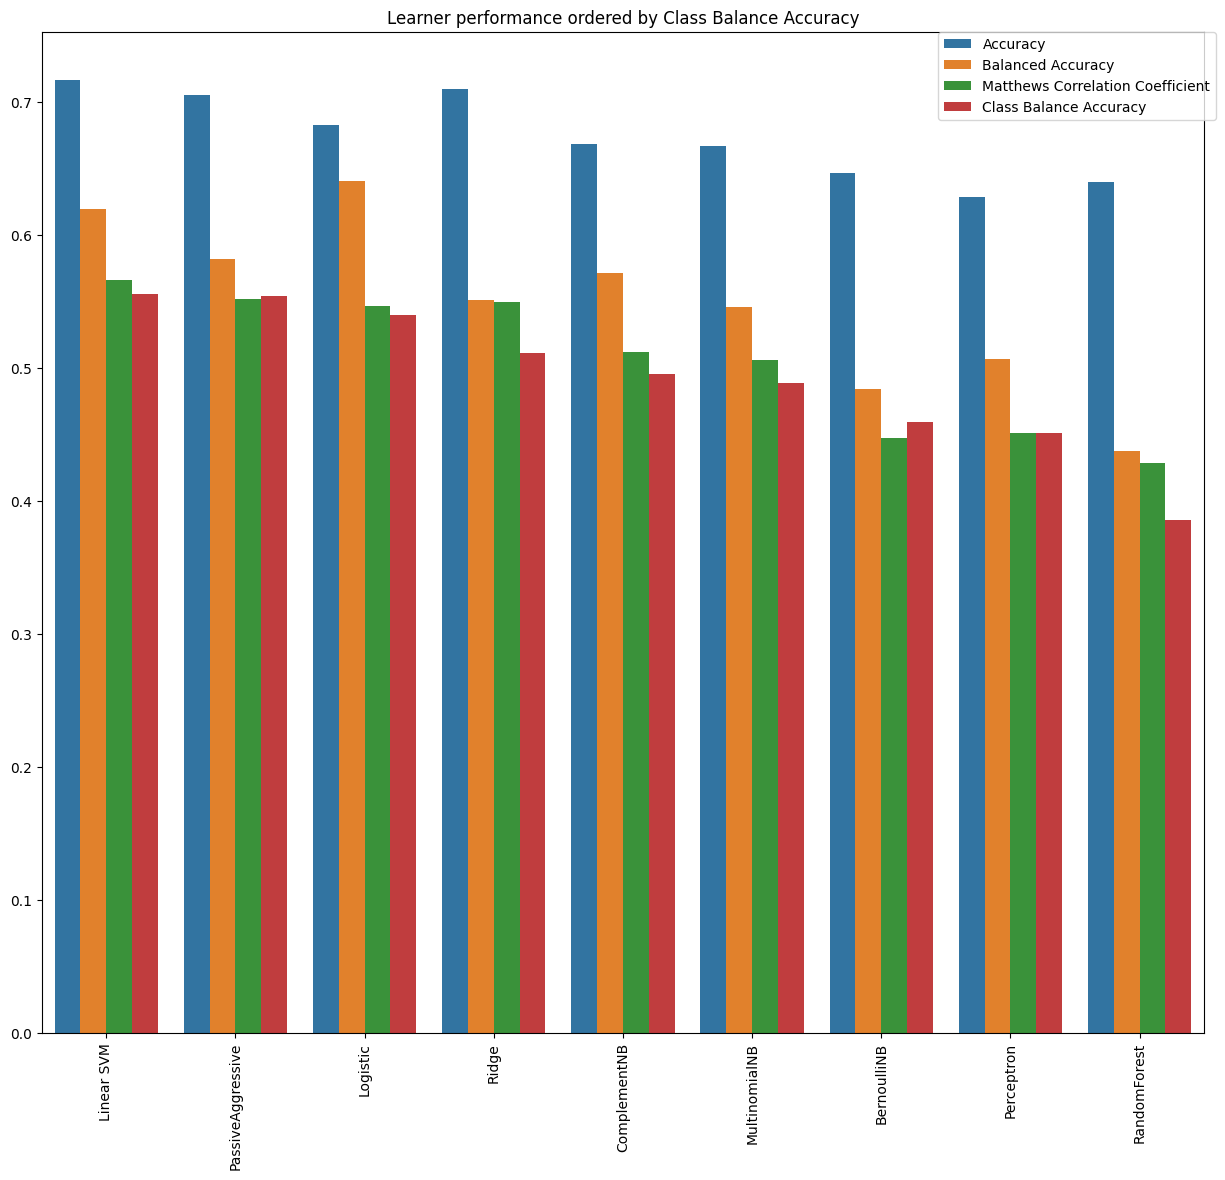

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f08f562d3d0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f08f7a51820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(1, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.7, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f08fac2b040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__alpha=1, clf__es

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fec3bc082e0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fec424fa820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fec456d4040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__class_weight

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fe92e50fe50>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fe9324de820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fe9356b8040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__class_weight

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

[CV]  sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7fd0650cf8b0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7fd0670bd820>, preprocessor__texttr__text__transformer__norm=l2, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7fd06a297040>, featsel__selector__percentile=100, featsel__selector=SelectPercentile(), clf__estimator__alpha=0.5, cl

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

[CV] sampling__kw_args={'up_balancing_counts': 300}, preprocessor__texttr__text__transformer__use_idf=False, preprocessor__texttr__text__transformer__tokenizer=<pxtextmining.helpers.tokenization.LemmaTokenizer object at 0x7f6fbd621fa0>, preprocessor__texttr__text__transformer__preprocessor=<function text_preprocessor at 0x7f6fbfa7b820>, preprocessor__texttr__text__transformer__norm=None, preprocessor__texttr__text__transformer__ngram_range=(2, 3), preprocessor__texttr__text__transformer__min_df=3, preprocessor__texttr__text__transformer__max_df=0.95, preprocessor__texttr__text__transformer=TfidfVectorizer(), preprocessor__sentimenttr__scaler__scaler__n_bins=8, preprocessor__sentimenttr__scaler__scaler=KBinsDiscretizer(strategy='kmeans'), preprocessor__lengthtr__scaler__scaler=KBinsDiscretizer(n_bins=3, strategy='kmeans'), featsel__selector__score_func=<function chi2 at 0x7f6fc2c56040>, featsel__selector__percentile=70, featsel__selector=SelectPercentile(), clf__estimator__class_weight=

/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/home/yiwen-h/.pyenv/versions/3.8.12/envs/text_venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not 

In [16]:
from pxtextmining.factories.factory_model_performance import factory_model_performance
pipe, tuning_results, pred, accuracy_per_class, p_compare_models_bar = \
        factory_model_performance(pipe, x_train, y_train, x_test, y_test, 'class balance accuracy')

In [21]:
import joblib
model = pipe.best_estimator_
joblib.dump(model, '5_level_sentiment_model.joblib')

['5_level_sentiment_model.joblib']

In [27]:
from pxtextmining.factories.factory_write_results import factory_write_results

pred, index_training_data, index_test_data = factory_write_results(pipe,
                                                                       tuning_results,
                                                                       pred,
                                                                       accuracy_per_class,
                                                                       p_compare_models_bar,
                                                                       'sentiment',
                                                                       x_train,
                                                                       x_test,
                                                                       index_training_data,
                                                                       index_test_data,
                                                                       'class_balance_accuracy',
                                                                       [
                                     "pipeline",
                                     "tuning results",
                                     "predictions",
                                     "accuracy per class",
                                     "index - training data",
                                     "index - test data",
                                     "bar plot"
                                 ],
                                                                       save_objects_to_server = False,
                                                                       save_objects_to_disk = True,
                                                                       save_pipeline_as = '5_level_sentiment',
                                                                       results_folder_name = "5_level_sentiment")

Writing to disk...
